In [2]:
from Bio import Phylo

In [8]:
import pickle
import numpy as np
import pandas as pd

In [16]:
from tqdm import tqdm

In [9]:
def mut_freq(mt_muts, max_mut_id = None, sel_cells=None):
    if not max_mut_id:
        max_mut_id = np.max([np.max(list(j)) for j in mt_muts[i.name] if j for i in mt_muts])
    max_mut_id += 1
    mut_freqs = []
    cell_names = []
    for cell in tqdm(sel_cells):
        mut_pos = np.zeros((len(mt_muts[cell]), max_mut_id))
        for ind, mt in enumerate(mt_muts[cell]):
            mut_pos[ind][list(mt)] = 1
        mut_freqs.append(mut_pos.sum(0)/len(mt_muts[cell]))
        cell_names.append(cell)
    mf = pd.DataFrame(mut_freqs, index=cell_names)
    mf = mf[mf.columns[mf.sum()>0]]
    return mf

In [88]:
tree = Phylo.read('/data3/wangkun/mtsim_res/res_1113/630531/linear_tree_gt_630531.nwk', format='newick')

In [4]:
mt = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/630531/mt_allmuts_early_0.1_630531.pkl', 'rb'))

In [21]:
import matplotlib.pyplot as plt

100%|██████████| 1/1 [00:00<00:00, 280.52it/s]


(array([88., 10.,  1.,  2.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([0.002 , 0.0116, 0.0212, 0.0308, 0.0404, 0.05  , 0.0596, 0.0692,
        0.0788, 0.0884, 0.098 ]),
 <BarContainer object of 10 artists>)

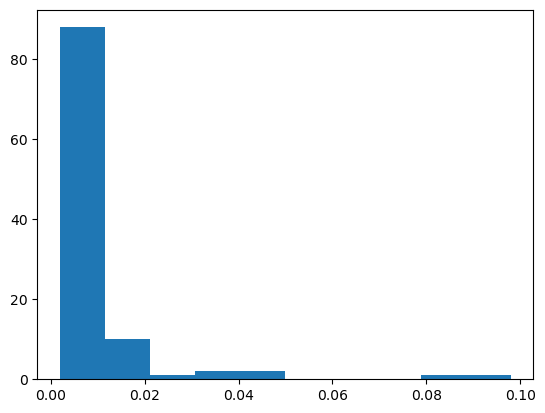

In [26]:
plt.hist(mut_freq(mt, max([np.max(list(i)) for i in mt['<0_0>'] if len(i)>0]), ['<0_0>']).to_numpy()[0])

In [80]:
from collections import Counter
def specific_mutation(cell, cell_group, mts, cutoff=0):
    # specific_mutation('<3_0>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)
    if cell in cell_group:
        cell_group.remove(cell)
    if cutoff:
        cnt = Counter(sum([list(i) for i in mt[cell]], []))
        muts = np.array(list(cnt.keys()))[np.array(list(cnt.values()))>cutoff]
        group_muts = set()
        for j in cell_group:
            cnt = Counter(sum([list(i) for i in mt[j]], []))
            jmuts = np.array(list(cnt.keys()))[np.array(list(cnt.values()))>cutoff]
            group_muts = group_muts.union(set(jmuts))
    else:
        muts = set(sum([list(i) for i in mt[cell]], []))
        group_muts = set(sum([sum([list(i) for i in mt[j]], []) for j in cell_group], []))
    muts, group_muts = list(muts), list(group_muts)
    return np.array(muts)[~np.isin(muts, group_muts)]

In [130]:
def ancestor_tracing(cells, ancestors, tree, count=True):
    ancestors = [tree.find_any(i) for i in ancestors]
    res = np.array([None]*len(cells))
    for anc in ancestors:
        res[np.isin(cells, [i.name for i in anc.get_terminals()])] = anc.name
    if count:
        return Counter(res)
    else:
        return res

In [129]:
cells = np.array([i.name for i in tree.get_terminals()])
cells = cells[np.random.choice(range(1000), 10, replace=False)]
ancestor_tracing(cells, [i for i in mt.keys() if i[1:3]=='3_'], tree)

Counter({'<3_0>': 9, '<3_1>': 1})

In [127]:
cells

array(['<19_1015>', '<25_1878>', '<25_586>', '<15_3422>', '<22_2200>',
       '<19_5556>', '<14_2709>', '<20_4424>', '<28_345>', '<23_2846>'],
      dtype='<U9')

In [93]:
specific_mutation('<3_1>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)

array([  2,  27,  60,  82,  97, 104])

In [95]:
specific_mutation('<3_3>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)

array([62, 68])

In [96]:
specific_mutation('<3_4>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)

array([ 34,  35,  54,  67, 103, 117])

In [97]:
specific_mutation('<3_5>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)

array([ 47,  94, 106, 114])

In [98]:
specific_mutation('<3_6>', [i for i in mt.keys() if i[1:3]=='3_'], mt, cutoff=0)

array([15, 29, 44])